<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/QuinnWorks122_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# LOADING AND CLEANING DATA

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Getting DATA, naming column headers, replacing missing values with NaNs
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, 
                 names=['party','handicapped-infants', 'water-project',
                        'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
                        'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
                        'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free','south-africa'],
                        na_values = "?")

In [154]:
df.head(3)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n


In [155]:
#replacing y&n's to binary number
df = df.replace({'y':1, 'n':0})
print(df.shape)
df.head(3)

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [156]:
#Splitting data by party
dem=df[df.party == 'democrat']
dem.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [157]:
rep=df[df.party == 'republican']
rep.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [158]:
dem.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
print(dem.shape)
dem.isnull().sum()

(267, 17)


party                    0
handicapped-infants      9
water-project           28
budget                   7
physician-fee-freeze     8
el-salvador-aid         12
religious-groups         9
anti-satellite-ban       8
aid-to-contras           4
mx-missile              19
immigration              4
synfuels                12
education               18
right-to-sue            15
crime                   10
duty-free               16
south-africa            82
dtype: int64

In [160]:
rep.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
print(rep.shape)
rep.isnull().sum()

(168, 17)


party                    0
handicapped-infants      3
water-project           20
budget                   4
physician-fee-freeze     3
el-salvador-aid          3
religious-groups         2
anti-satellite-ban       6
aid-to-contras          11
mx-missile               3
immigration              3
synfuels                 9
education               13
right-to-sue            10
crime                    7
duty-free               12
south-africa            22
dtype: int64

# Reviewing Concepts

In [162]:
#Example of 2-Sample T Test
stats.ttest_ind(dem['budget'],rep['budget'], nan_policy='omit')

Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)

In [163]:
#Example of 1-Sample T Test
stats.ttest_1samp(rep['budget'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=-13.705331355148527, pvalue=6.249973784238298e-29)

In [164]:
#Showing how numpy stdv works w/& w/o a degrees of freedom
mean = np.mean(rep['budget'])
stdv = np.std(rep['budget'], ddof=1)
stdvN = np.std(rep['budget'])
print('Mean:',mean)
print('STD of Sample of Pop:',stdv)
print('STD of Population:',stdvN)

Mean: 0.13414634146341464
STD of Sample of Pop: 0.34185330768366606
STD of Population: 0.34080947835322273


# Confidence Intervals:
1.Generate and numerically represent a confidence interval

2.Graphically (with a plot) represent the confidence interval

3.Interpret the confidence interval - what does it tell you about the data and its distribution?

![alt text](https://i.pinimg.com/236x/b6/29/00/b629006488a745abe36224985ef34a9a.jpg)

In [0]:
#What is the probability that x = .134 is within 2 standard deviations of X
n= len(rep['budget'])
dof = n-1
tstat = stats.t.ppf(.975, dof)
std = np.std(rep['budget'], ddof=1)
mean = np.mean(rep['budget'])
std_err = std/n**.5
moe = tstat * std_err


In [166]:
print('n:',n)
print('dof:',dof)
print('sample mean:',mean)
print('tstat:',tstat)
print('stdv:',std)
print('stderr:',std_err)
print('margin of error:',moe)

n: 168
dof: 167
sample mean: 0.13414634146341464
tstat: 1.9742709570223844
stdv: 0.34185330768366606
stderr: 0.026374555285605703
margin of error: 0.05207051850475256


In [0]:
CI = (mean, mean-(moe) , mean+(moe))

In [168]:
print('Mean:', mean)
print('TStat:', tstat)
print('MOE:', moe)
print('CI:', CI)

Mean: 0.13414634146341464
TStat: 1.9742709570223844
MOE: 0.05207051850475256
CI: (0.13414634146341464, 0.08207582295866209, 0.1862168599681672)


In [0]:
#With 95% confidence, the population mean for republican congressmen who voted
#to pass the budget bill is between 8.21% and 18.62%. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


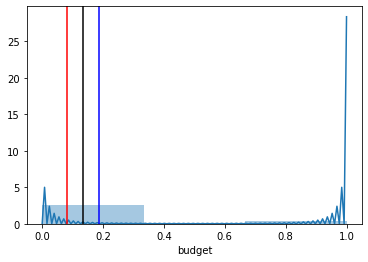

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(rep['budget'], bins=3)
#CI = confidence_interval(coinflips)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='blue')
plt.axvline(x=CI[0], color='k');


# CI Function

In [0]:
def confidence_interval (data, confidence=.95):
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  tstat = stats.t.ppf((1+confidence)/2, n-1)
  stderr = s / np.sqrt(n)
  moe = tstat * stderr
  return (mean, moe, mean-moe, mean+moe)

In [172]:
confidence_interval(rep['budget'])

(0.13414634146341464,
 0.05207051850475256,
 0.08207582295866209,
 0.1862168599681672)

In [173]:
confidence_interval(rep['education'])

(0.8709677419354839,
 0.051228045724459256,
 0.8197396962110246,
 0.9221957876599431)

In [174]:
confidence_interval(rep['crime'])

(0.9813664596273292,
 0.02066180970618109,
 0.960704649921148,
 1.0020282693335103)

Text(0.5, 1.0, 'Confidence Interval of Sample Mean')

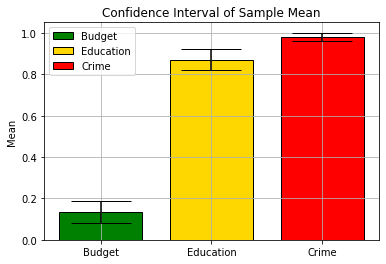

In [175]:
#https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/
#setting data = mean
barWidth = 0.75
bar1= np.mean(rep['budget'])
bar2= np.mean(rep['education'])
bar3= np.mean(rep['crime'])

#Margin of errror for each bill
err1= .0520705
err2= .051228
err3= .02066

#Plotting means of the three bills; x axis is just position
plt.bar(1, bar1, width = barWidth,
        color = 'green', edgecolor = 'black',
        yerr=err1, capsize=30, label='Budget')

plt.bar(2, bar2, width = barWidth,
        color = 'gold', edgecolor = 'black',
        yerr=err2, capsize=30, label='Education')

plt.bar(3, bar3, width = barWidth,
        color = 'red', edgecolor = 'black',
        yerr=err3, capsize=30, label='Crime')

plt.ylabel('Mean') # label y axis
plt.xticks([1,2,3],['Budget','Education','Crime']) #x axis tick labels
plt.legend() #add legend
plt.grid() #turn on gridlines
plt.title('Confidence Interval of Sample Mean')


In [176]:
print('BUDGET')
print(confidence_interval(rep['budget']))
print('EDUCATION')
print(confidence_interval(rep['education']))
print('CRIME')
print(confidence_interval(rep['crime']))


BUDGET
(0.13414634146341464, 0.05207051850475256, 0.08207582295866209, 0.1862168599681672)
EDUCATION
(0.8709677419354839, 0.051228045724459256, 0.8197396962110246, 0.9221957876599431)
CRIME
(0.9813664596273292, 0.02066180970618109, 0.960704649921148, 1.0020282693335103)


# Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data

1.By hand using Numpy

2.In a single line using Scipy

In [177]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df= pd.read_csv(url, header=None, names= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [178]:
df = df.replace({" ?" : np.NaN})
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [179]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [180]:
contingency_table = pd.crosstab(df['sex'], df['education'], margins=True)
contingency_table

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806,10771
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485,21790
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [181]:
observed = pd.crosstab(df['sex'], df['education'])
print(observed.shape)
observed

(2, 16)


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
sex,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485


In [182]:
#Expected Value table
fcount = observed.iloc[0][0:16].values
fcount

array([ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
       3390,  536,   16,   92, 2806])

In [183]:
mcount = observed.iloc[1][0:16].values
mcount

array([ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
       7111, 1187,   35,  484, 4485])

In [184]:
row_sum = contingency_table.iloc[0:2,16].values
col_sum = contingency_table.iloc[2,0:16].values
print(row_sum)
print(col_sum)

#Sample Size
total = contingency_table.loc['All','All']
total

[10771 21790]
[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]


32561

In [185]:
expected = []
for i in range(len(row_sum)):
  expected_row = []
  for column in col_sum:
    expected_val = column*row_sum[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

print(expected.shape)
print(expected)


(2, 16)
[[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


In [186]:
observed = np.array(observed)
observed

array([[ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
        3390,  536,   16,   92, 2806],
       [ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
        7111, 1187,   35,  484, 4485]])

In [187]:
#Chi Square Statistic 
chi_squared = ((observed - expected)**2/ (expected)).sum()
print('Chi_Squared',chi_squared)

Chi_Squared 297.71500372503687


In [188]:
from scipy.stats.distributions import chi2
dof = (len(row_sum)-1)* len(col_sum -1)
print('DOF',dof)
print(chi_squared)
print('P-Val', chi2.sf(chi_squared,dof))


DOF 16
297.71500372503687
P-Val 7.581278643744267e-54


In [0]:
#.05>7.58x10-54
#Based on P-val, I reject the null hyphypothesis that gender and education are independent

In [190]:
chi_squared, p_val, dof, expected = stats.chi2_contingency(observed)
print('Chi2',chi_squared)
print('PVal',p_val)
print('DOF',dof)
print('Expected',expected)

Chi2 297.71500372503687
PVal 1.667778440920507e-54
DOF 15
Expected [[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)